# Exploratory Data Analysis

## Import dependencies

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from scipy.stats import boxcox, yeojohnson, skew
from sklearn.preprocessing import QuantileTransformer, KBinsDiscretizer
import warnings # ignore warnings
warnings.filterwarnings('ignore')

## Import dataset

In [2]:
df = pd.read_csv('../data/customers_100k.csv', sep='|') 

In [3]:
df.head(10)

account_id country_name account_category  \
0  ac6a99474410f1c59c91da3f0cf9cf3f        Tonga         Standard   
1  1cc66628ed41f3db5a55195e93277a04   Costa Rica         Standard   
2  db5f3cdd5629b9591b720b9b7e077df2   Costa Rica         Standard   
3  bebb4028688f519f36ed220855b0a62f   Costa Rica         Standard   
4  507c0bfb67895d773e3f8bd33b861d09   Costa Rica         Standard   
5  b1267a5b953b7267de811510f838172b   Costa Rica         Standard   
6  3315ad169d4d2e9080f1377c44377c7c   Costa Rica         Standard   
7  8ca7b69eda1a06b32e60fff1c6db3b28   Costa Rica         Standard   
8  5bd2eea4e2320b9246b41a8f54fb02d2   Costa Rica              SMB   
9  bbfb03bca60fb0185be3f36d12c99b3f   Costa Rica         Standard   

  bi_account_classification      customer_type    region  sic_code  \
0              Inside Sales           Customer      APAC      7381   
1              Inside Sales           Customer  AMERICAS      5049   
2              Inside Sales           Customer  AMERICAS      7389   
3                  Reseller  End-User Reseller  AMERICAS      8711   
4              Inside Sales           Customer  AMERICAS      6531   
5              Inside Sales           Customer  AMERICAS      5943   
6                  Reseller           Reseller  AMERICAS      7378   
7              Inside Sales           Customer  AMERICAS         1   
8              Inside Sales           Customer  AMERICAS      8111   
9              Inside Sales           Customer  AMERICAS      8731   

   employee_number  revenue_in_eur  number_distinct_active_licenses  ...  \
0                8       1502000.0                                1  ...   
1               11       1814000.0                                1  ...   
2               16      13444000.0                                1  ...   
3               36       7066000.0                                3  ...   
4              312      61054000.0                                2  ...   
5               25       4881000.0                                1  ...   
6               15       3013000.0                                9  ...   
7              717     159214000.0                                1  ...   
8                5        934000.0                                3  ...   
9               22       4308000.0                                2  ...   

  total_connections_12m  total_endpoints_12m  total_devices_12m  \
0                    54                    4                  2   
1                  3385                  158                 51   
2                    12                    2                  2   
3                  1724                  206                 30   
4                  6493                  611                 31   
5                   583                    3                  5   
6                  2181                  311                  7   
7                  2415                  244                  4   
8                 22037                 3766               1311   
9                  4064                  672                 15   

   last_invoice_date_created current_sales_channel age_customer  \
0        2023-11-23 01:57:47               Webshop            6   
1        2023-10-07 19:35:11               Webshop            1   
2        2023-12-02 02:03:05               Webshop            2   
3        2023-10-25 23:32:46          Inside Sales            7   
4        2023-11-17 04:16:51          Inside Sales           10   
5        2023-08-21 01:11:38               Webshop            5   
6        2023-09-28 04:27:43              Reseller            7   
7        2023-12-22 06:27:18                 Other           12   
8        2023-09-22 01:48:17          Inside Sales            9   
9        2023-12-20 01:21:26          Inside Sales           15   

   number_renewals  account_value_in_eur  billings_ltm_prorated  \
0                5               2532.84                 466.47   
1                0               1298.15       

## Variable Description

* **account_id**: Masked customer ID in TeamViewer.
* **country_name**: Name of the country.
* **account_category**: Characterization of the account.
* **bi_account_classification**: Internal classification of the account.
* **customer_type**: Type of customer.
* **region**: AMS, EMEA or APAC.
* **sic_code**: 4-digit code that describes the customer's business type.
* **employee_number**: Number of employees of the company.
* **revenue_in_eur**: Reported revenue generated by the company in EUR.
* **number_distinct_active_licenses**: Total Number of distinct and active licenses.
* **major_edition**: Type of license purchased.
* **total_connections_12m**: Total number of connections in the last 12 months.
* **total_endpoints_12m**: Total number of endpoints connected in the last 12 months.
* **total_devices_12m**: Total number of devices connected in the last 12 months.
* **last_invoice_date_created**: Date of the last invoice.
* **current_sales_channel**: Sales Channel used.
* **age_customer**: Age of the customer with TV.
* **number_renewals**: Number of times the customer renewed the contract.
* **account_value_in_eur**: Customer value for TV in EUR.
* **billings_ltm_prorated**: Annual contract value for the last 12 months.
* **business_model**: Subscription or Perpetual.

## Data Understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   account_id                       100000 non-null  object 
 1   country_name                     100000 non-null  object 
 2   account_category                 100000 non-null  object 
 3   bi_account_classification        100000 non-null  object 
 4   customer_type                    100000 non-null  object 
 5   region                           100000 non-null  object 
 6   sic_code                         100000 non-null  int64  
 7   employee_number                  100000 non-null  int64  
 8   revenue_in_eur                   100000 non-null  float64
 9   number_distinct_active_licenses  100000 non-null  int64  
 10  major_edition                    100000 non-null  object 
 11  total_connections_12m            100000 non-null  int64  
 12  tot

In [5]:
df.describe()

sic_code  employee_number  revenue_in_eur  \
count  100000.000000    100000.000000    1.000000e+05   
mean     5879.682920       297.198880    1.253197e+08   
std      2280.167339      4463.491202    2.653859e+09   
min         1.000000         1.000000    1.000000e+00   
25%      4731.000000         3.000000    2.248878e+05   
50%      6512.000000         8.000000    1.143722e+06   
75%      7389.000000        30.000000    5.288708e+06   
max      9999.000000    543000.000000    4.408149e+11   

       number_distinct_active_licenses  total_connections_12m  \
count                     100000.00000           1.000000e+05   
mean                           1.64531           1.834676e+03   
std                            1.29076           9.158201e+03   
min                            1.00000           1.000000e+00   
25%                            1.00000           1.140000e+02   
50%                            1.00000           4.160000e+02   
75%                            2.00000           1.377000e+03   
max                          155.00000           1.140462e+06   

       total_endpoints_12m  total_devices_12m   age_customer  number_renewals  \
count        100000.000000      100000.000000  100000.000000    100000.000000   
mean            187.814590          21.411450       6.422390         3.781310   
std             751.854495         117.205407       3.901829         3.359553   
min               1.000000           1.000000       1.000000         0.000000   
25%               6.000000           2.000000       3.000000         2.000000   
50%              30.000000           5.000000       5.000000         4.000000   
75%             138.000000          15.000000       9.000000         5.000000   
max           78107.000000       13094.000000      18.000000       212.000000   

       account_value_in_eur  billings_ltm_prorated  
count          1.000000e+05          100000.000000  
mean           5.449461e+03            1087.345111  
std            1.737684e+04            4750.485586  
min            0.000000e+00               1.000000  
25%            1.275970e+03             349.710000  
50%            2.483385e+03             520.500000  
75%            6.218025e+03            1199.000000  
max            2.352140e+06          694803.410000

## Data Cleaning

In [6]:
df.isnull().sum()

account_id                         0
country_name                       0
account_category                   0
bi_account_classification          0
customer_type                      0
region                             0
sic_code                           0
employee_number                    0
revenue_in_eur                     0
number_distinct_active_licenses    0
major_edition                      0
total_connections_12m              0
total_endpoints_12m                0
total_devices_12m                  0
last_invoice_date_created          0
current_sales_channel              0
age_customer                       0
number_renewals                    0
account_value_in_eur               0
billings_ltm_prorated              0
business_model                     0
dtype: int64

Fortunately, this dataset contains no missing values. We’ll use visualization methods to look for trends and outliers in our collected data.

In [7]:
df[df.duplicated(keep=False)]

Empty DataFrame
Columns: [account_id, country_name, account_category, bi_account_classification, customer_type, region, sic_code, employee_number, revenue_in_eur, number_distinct_active_licenses, major_edition, total_connections_12m, total_endpoints_12m, total_devices_12m, last_invoice_date_created, current_sales_channel, age_customer, number_renewals, account_value_in_eur, billings_ltm_prorated, business_model]
Index: []

[0 rows x 21 columns]

As the above result, there are no duplicated values in our dataset.

## Data Visualization

In order to optimize the visualization process, we will be taken a 10k sample out of the dataset.

In [53]:
sample_df = df.sample(n=10000, random_state=123)

### Univariate Analysis

#### Numerical features

In [54]:
# Exclude the sic_code
exclude_col = ['sic_code']

# Select columns based on data type (float64 and int64)
numerical_cols = sample_df.select_dtypes(include=['float64', 'int64']).columns.difference(exclude_col)

# Select the desired columns from the DataFrame
numerical_df = sample_df[numerical_cols]

In [55]:
numerical_df.columns

Index(['account_value_in_eur', 'age_customer', 'billings_ltm_prorated',
       'employee_number', 'number_distinct_active_licenses', 'number_renewals',
       'revenue_in_eur', 'total_connections_12m', 'total_devices_12m',
       'total_endpoints_12m'],
      dtype='object')

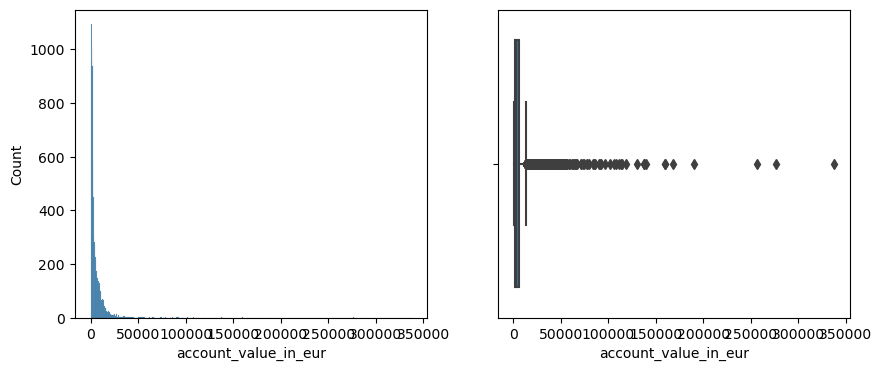

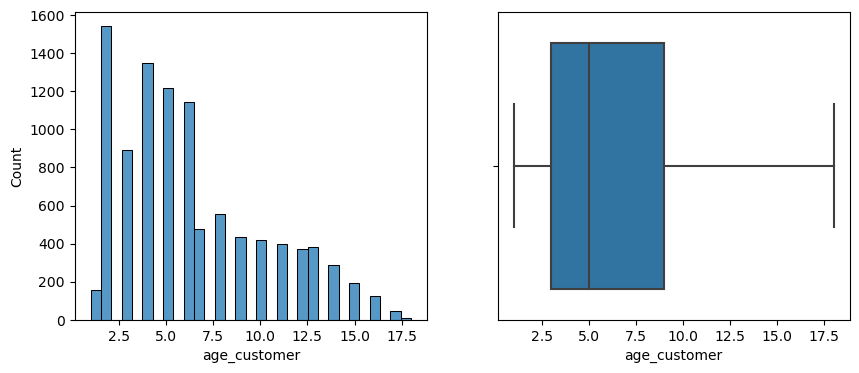

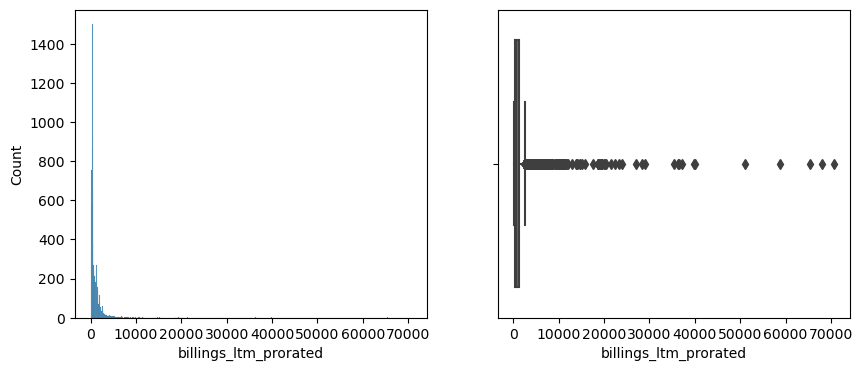

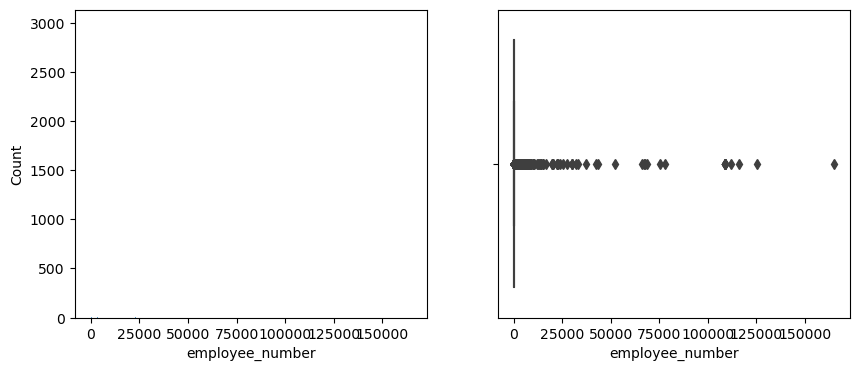

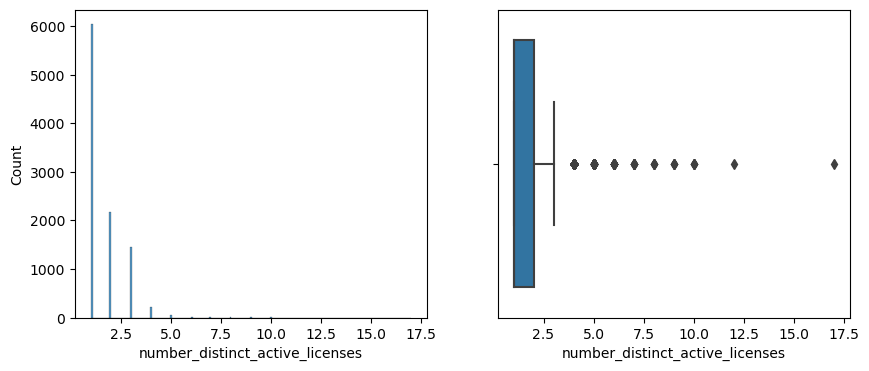

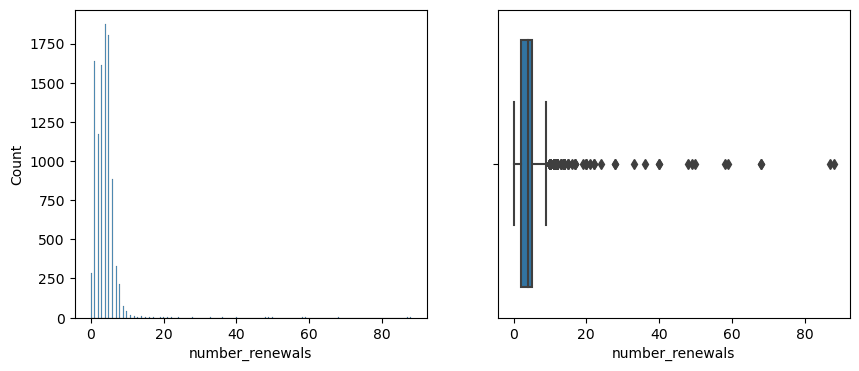

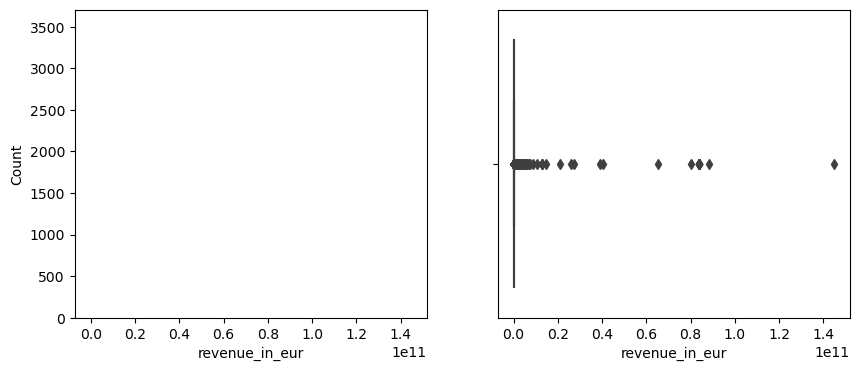

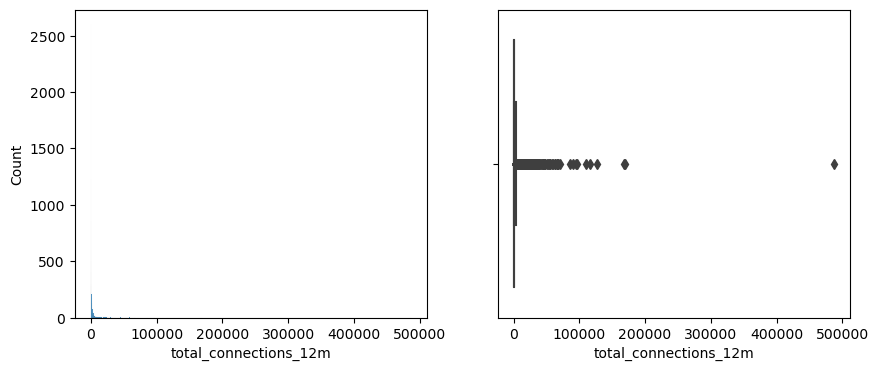

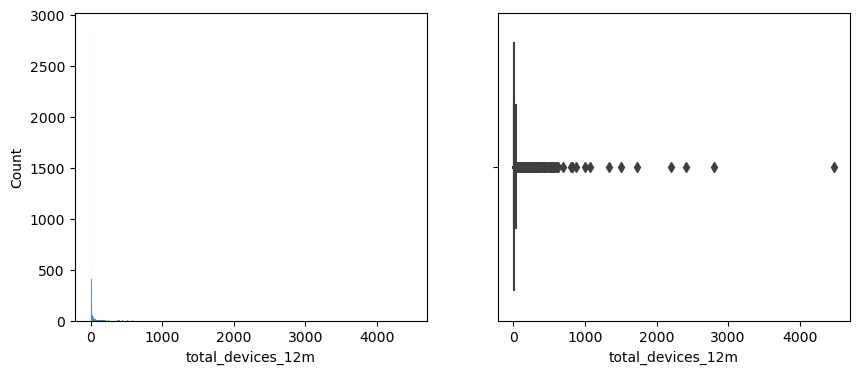

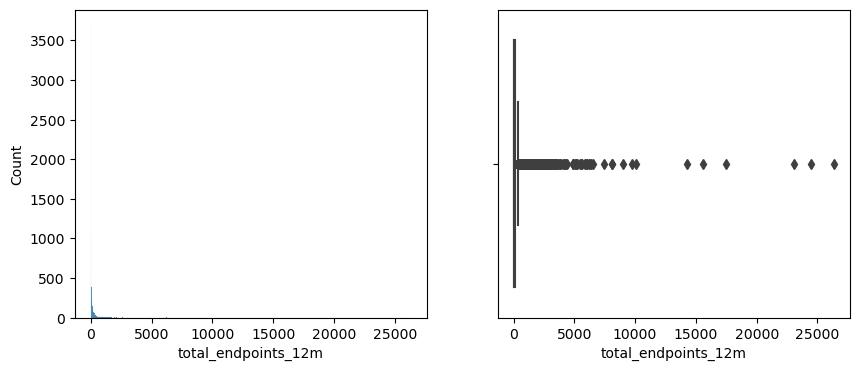

In [11]:
# Visualize the distribution of each variable
for col in numerical_cols:
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    sns.histplot(data=numerical_df, x=col, ax=ax[0])
    sns.boxplot(data=numerical_df, x=col, ax=ax[1])

As we can see from the above histogram of our dataset, all columns have a **right-skewed distribution**, which means that wee need to perform a scaling transformation in order to have a more normal distributed data in all columns. For that we will evaluate which transformation better suits our data.

In [12]:
fig = px.scatter_matrix(numerical_df,
                        width=1200,
                        height=1600)
fig.show()

##### Scaling

In [56]:
def apply_scaling_transformations(df, column_name):
  """
  Applies square root, log1p, box-cox, yeo-johnson and quantile transformations to a column.

  Args:
      df (pandas.DataFrame): The dataframe containing the column to transform.
      column_name (str): The name of the numerical column to transform.

  Returns:
      pandas.DataFrame: The original dataframe with new transformed columns.
  """
  
  data = df[column_name].copy()

  # Apply transformations with prefix
  df["sqrt_" + column_name] = np.sqrt(data)
  df["log1p_" + column_name] = np.log1p(data)
  df["boxcox_" + column_name] = boxcox(data + 1)[0]  # Add 1 to avoid negative values
  df["yeojohnson_" + column_name] = yeojohnson(data)[0]
  
  quantile_transformer = QuantileTransformer(output_distribution="normal", random_state=0)
  df["quantile_" + column_name] = quantile_transformer.fit_transform(data.values.reshape(-1, 1)).flatten()

  return df

In [57]:
for col in numerical_cols:
    apply_scaling_transformations(numerical_df, col)

In [58]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 42083 to 61044
Data columns (total 60 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   account_value_in_eur                        10000 non-null  float64
 1   age_customer                                10000 non-null  int64  
 2   billings_ltm_prorated                       10000 non-null  float64
 3   employee_number                             10000 non-null  int64  
 4   number_distinct_active_licenses             10000 non-null  int64  
 5   number_renewals                             10000 non-null  int64  
 6   revenue_in_eur                              10000 non-null  float64
 7   total_connections_12m                       10000 non-null  int64  
 8   total_devices_12m                           10000 non-null  int64  
 9   total_endpoints_12m                         10000 non-null  int64  
 10  sqrt_a

In [59]:
def plot_transformations(df, column_name):
  """
  Plots the distribution of the original column and its various transformations.

  Args:
      df (pandas.DataFrame): The DataFrame containing the column to transform.
      column_name (str): The name of the numerical column to plot the transformations for.
  """
  
  trans_df = df.copy()  # Create a copy to avoid modifying original data

  # Get list of transformation column names (assuming suffix)
  trans_columns = [col for col in trans_df.columns if col.endswith(column_name)]

  # Create a subplot grid
  fig, axes = plt.subplots(2, 3, figsize=(18, 15))

  # Flatten the axes array for easier indexing
  axes = axes.flatten()

  # Plot Original Distribution
  sns.histplot(data=trans_df, x=column_name, kde=True, bins=30, color='skyblue', ax=axes[0])
  axes[0].set_title(f'Original {column_name} Distribution (Skew: {trans_df[column_name].skew():.5f})')
  axes[0].set_xlabel('Original Values')
  axes[0].set_ylabel('Frequency')

  # Loop through transformation columns and plot each
  for i, col in enumerate(trans_columns[1:]):
    sns.histplot(data=trans_df, x=col, kde=True, bins=30, ax=axes[i+1])
    transformation_name = col.split("_")[0]  # Extract transformation name from column
    axes[i+1].set_title(f'{transformation_name} {column_name} (Skew: {trans_df[col].skew():.5f})')
    axes[i+1].set_xlabel(f'{transformation_name} Values')
    axes[i+1].set_ylabel('Frequency')

  plt.tight_layout(pad=4.0)
  plt.show()

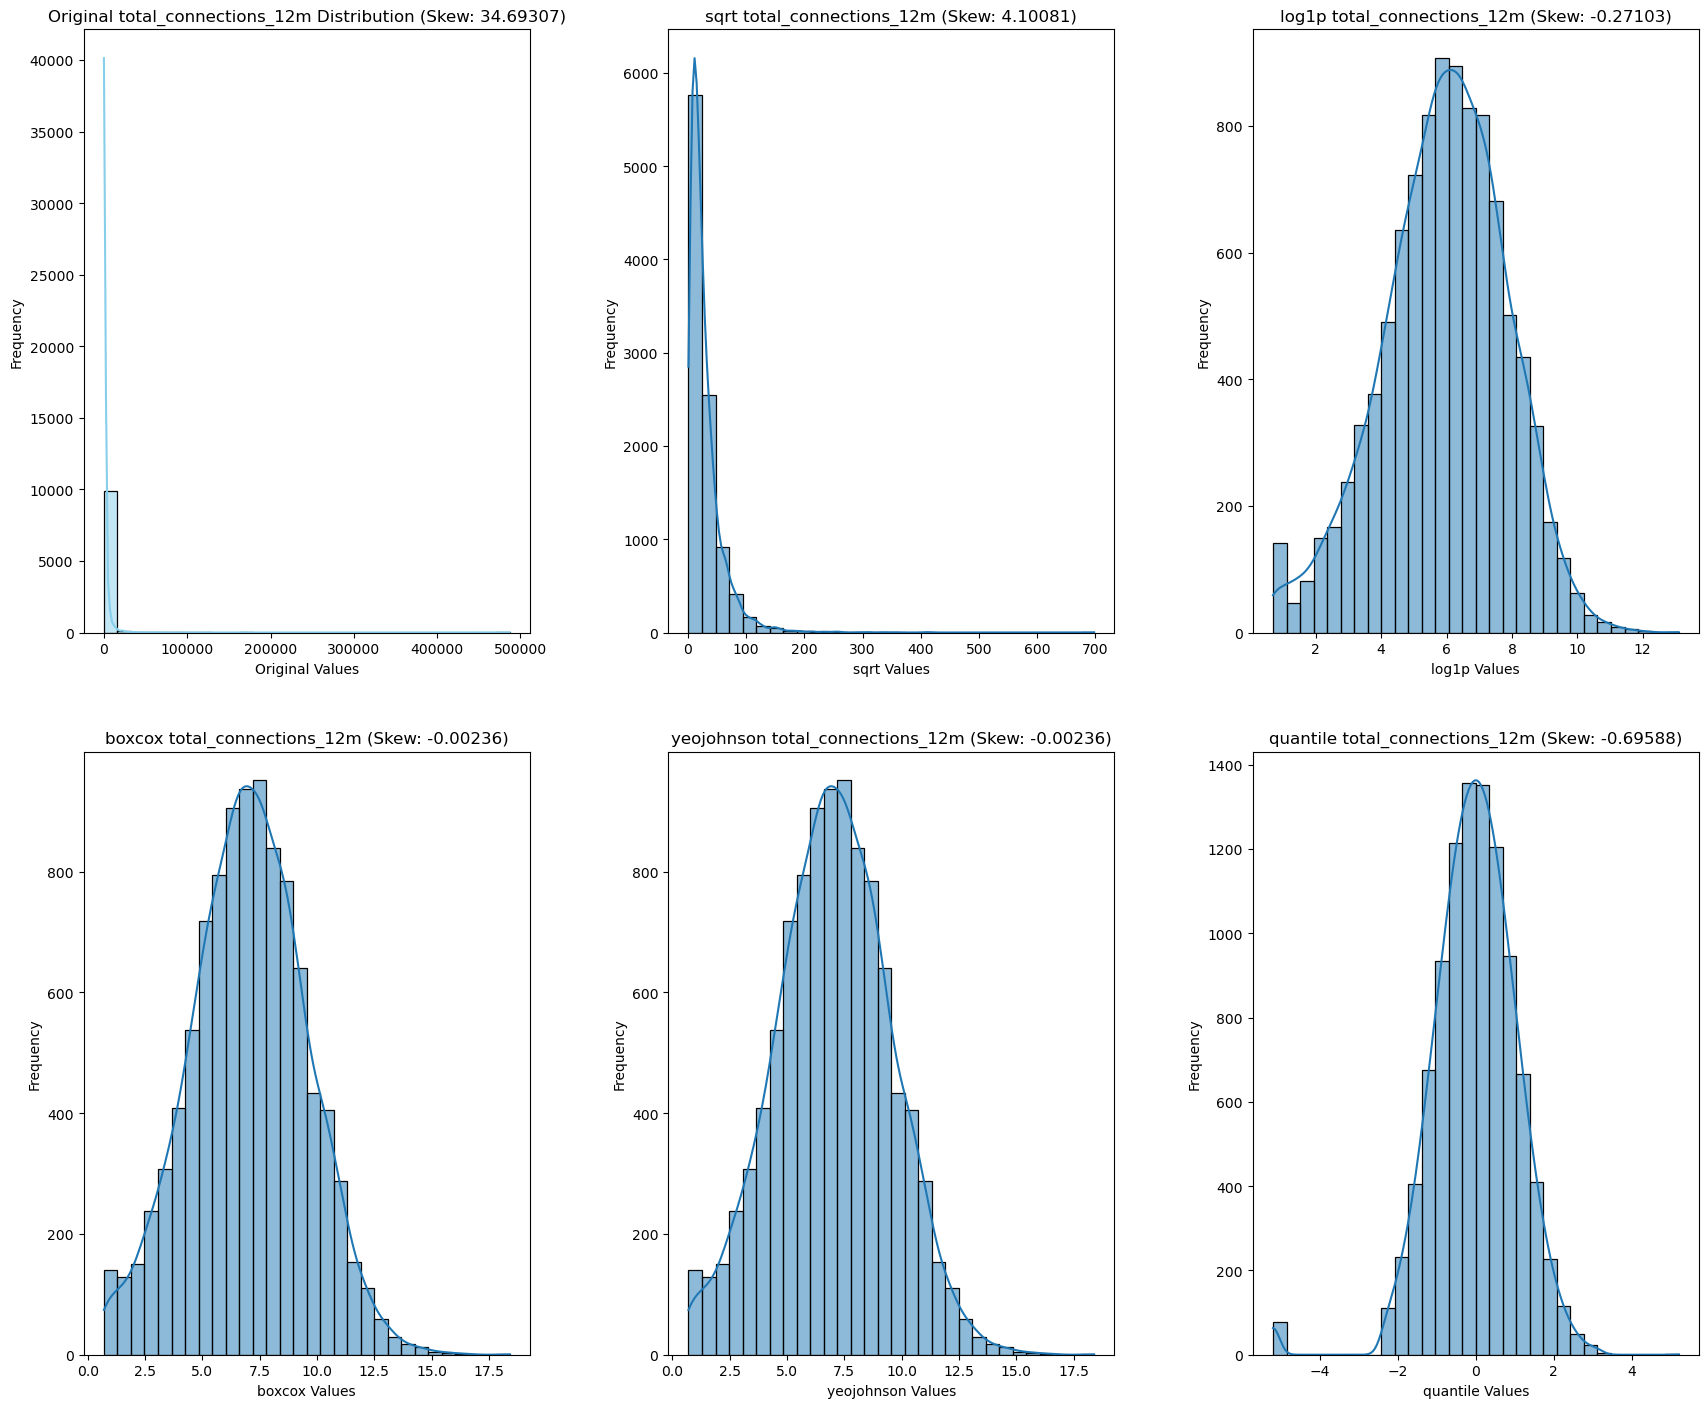

In [28]:
plot_transformations(numerical_df, "total_connections_12m")

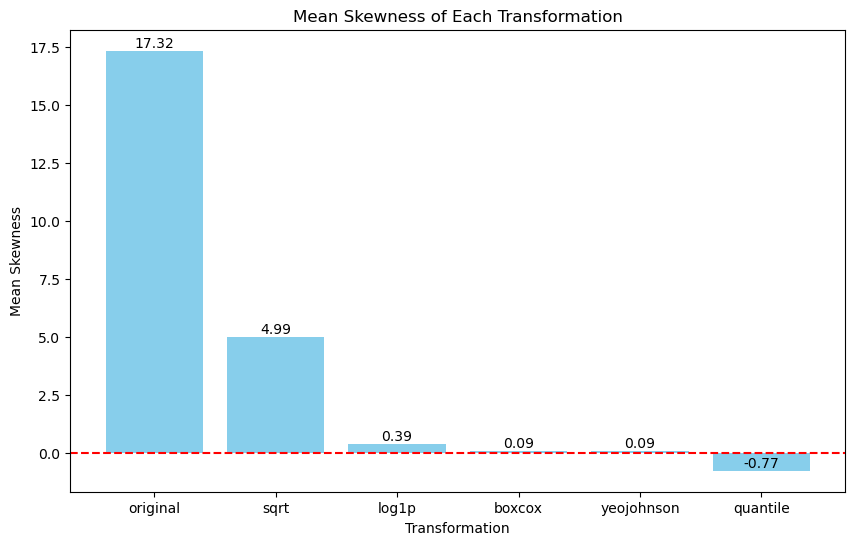

The best transformation based on mean skewness is: boxcox.


In [60]:
# Add original skewness to the dictionary
transformations = ["sqrt", "log1p", "boxcox", "yeojohnson", "quantile"]
original_columns = [column for column in numerical_df.columns if not any(column.startswith(prefix) for prefix in transformations)]
original_skewness = {column: skew(numerical_df[column]) for column in original_columns}
skewness_dict = {'original': list(original_skewness.values())}

# Compute skewness for each transformed column
for trans in transformations:
    for column_name in numerical_df.columns:
        if column_name.startswith(trans):
            if trans not in skewness_dict:
                skewness_dict[trans] = []
            skewness_dict[trans].append(skew(numerical_df[column_name]))

# Calculate mean skewness for each transformation
mean_skewness = {trans: np.mean(skew_values) for trans, skew_values in skewness_dict.items()}

# Plot the mean skewness
transformations = list(mean_skewness.keys())
mean_skew_values = list(mean_skewness.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(transformations, mean_skew_values, color='skyblue')
plt.xlabel('Transformation')
plt.ylabel('Mean Skewness')
plt.title('Mean Skewness of Each Transformation')
plt.axhline(y=0, color='r', linestyle='--')

# Add skew values above the bars
for bar, skew_value in zip(bars, mean_skew_values):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(skew_value, 2), ha='center', va='bottom')

plt.show()

# Determine the best transformation based on mean skewness closest to zero
best_transformation = min(mean_skewness, key=lambda k: abs(mean_skewness[k]))
print(f"The best transformation based on mean skewness is: {best_transformation}.")

Since the algorithm with closest average skewness to 0 is the Box-Cox Transformation, we'll now check if the variables still have outliers.

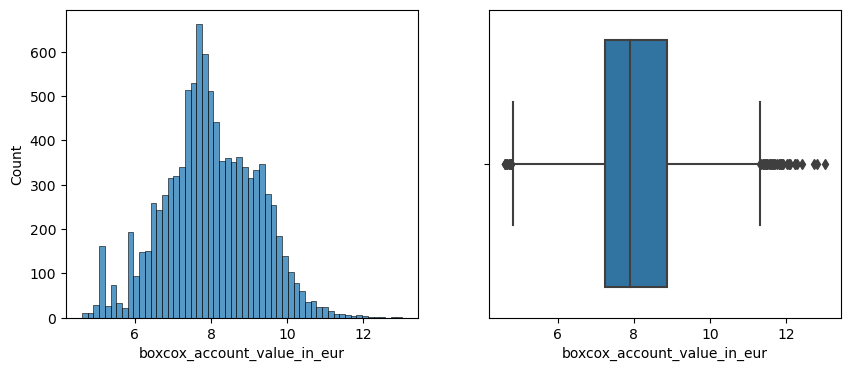

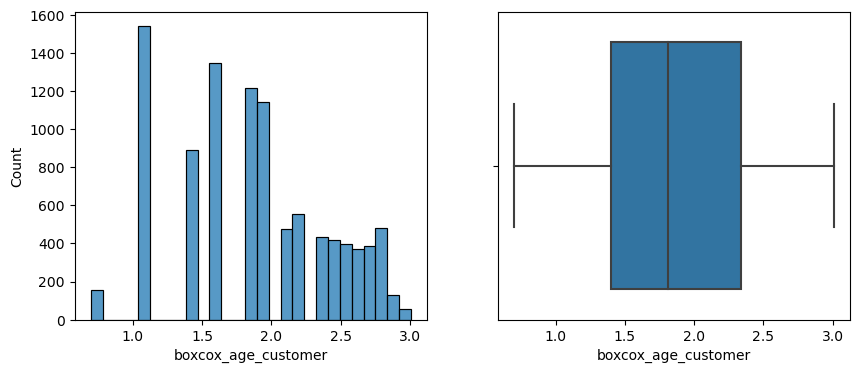

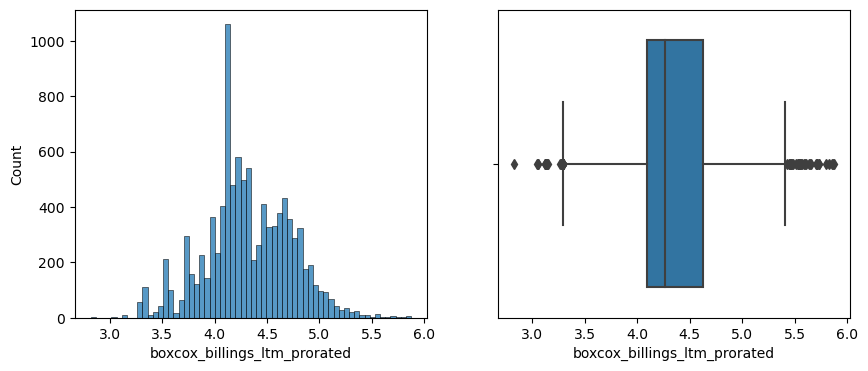

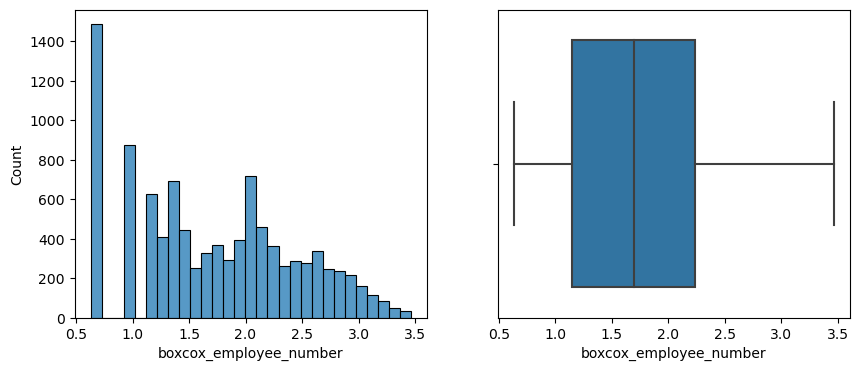

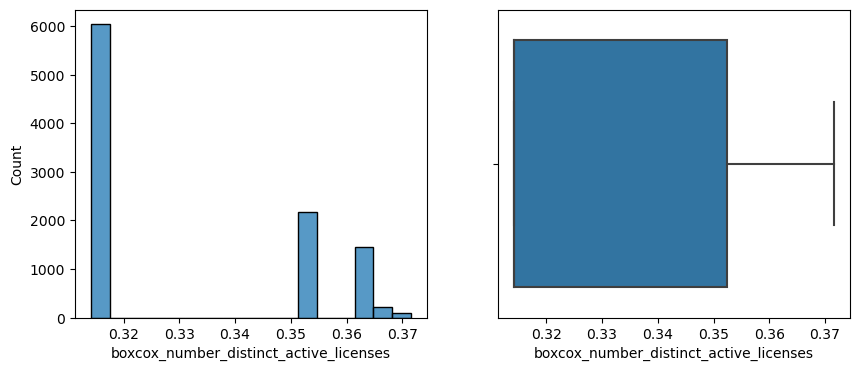

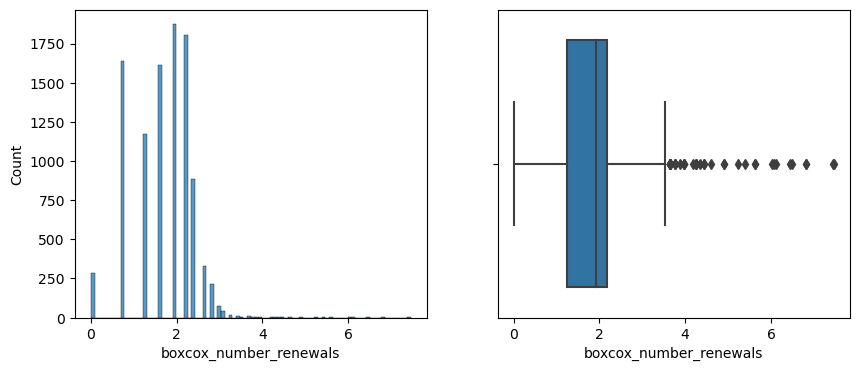

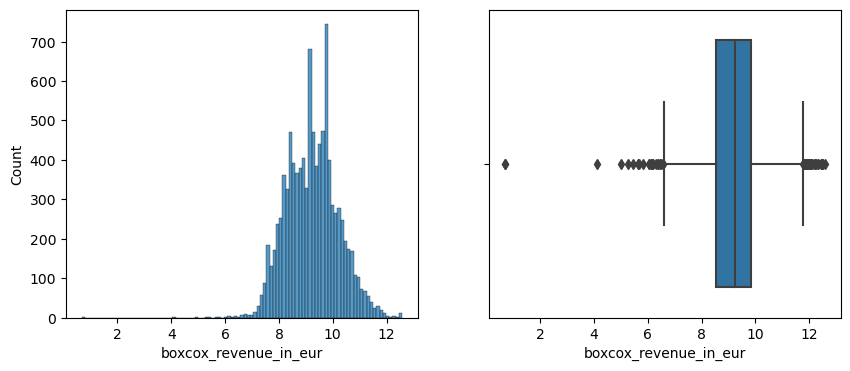

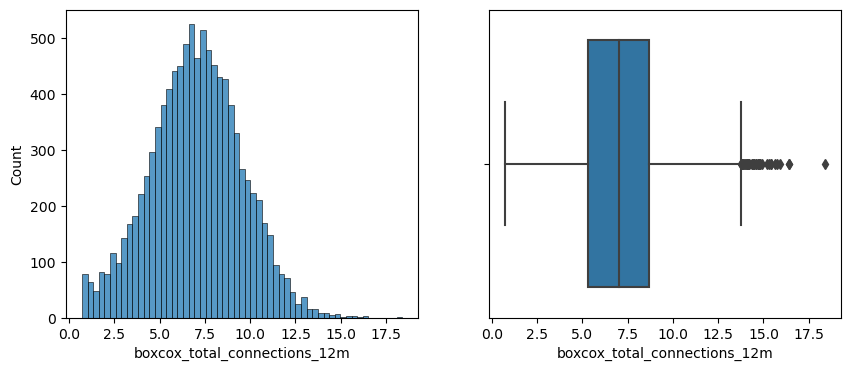

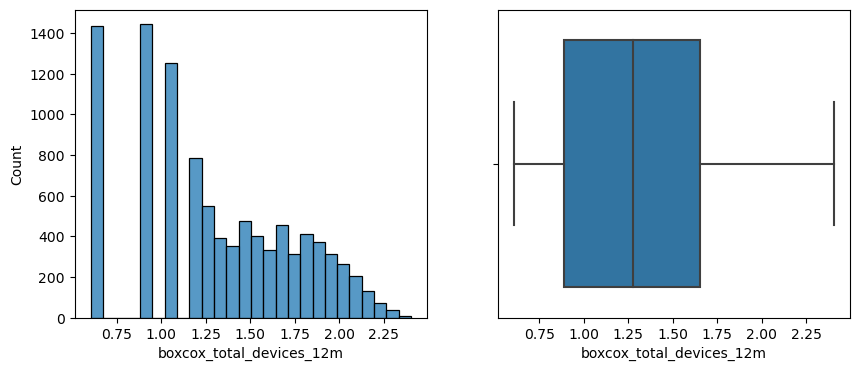

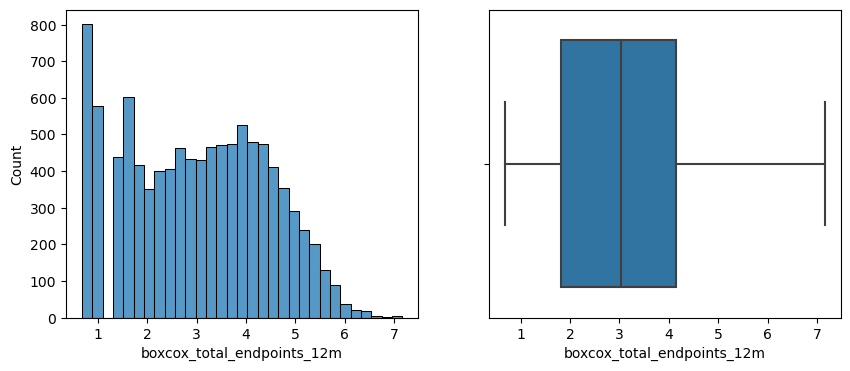

In [29]:
# Get list of Box-Cox transformed columns (assuming prefix)
prefix = 'boxcox_'
boxcox_columns = [col for col in numerical_df.columns if col.startswith(prefix)]

for col in boxcox_columns:
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    sns.histplot(data=numerical_df, x=col, ax=ax[0])
    sns.boxplot(data=numerical_df, x=col, ax=ax[1])

In [61]:
# Extract boxcox columns as a DataFrame
boxcox_df = numerical_df[boxcox_columns]

In [33]:
fig = px.scatter_matrix(boxcox_df,
                        width=1200,
                        height=1600)
fig.show()

In [62]:
boxcox_df.head(10)

boxcox_account_value_in_eur  boxcox_age_customer  \
42083                     7.356349             1.628357   
71825                     8.421135             1.628357   
99535                     9.223308             1.628357   
47879                     9.386074             2.440052   
36734                     6.751489             1.107406   
48636                     6.948800             1.107406   
59566                     7.309698             1.400315   
44826                     8.194740             1.628357   
51584                     6.460672             1.815228   
4368                      9.113244             2.690180   

       boxcox_billings_ltm_prorated  boxcox_employee_number  \
42083                      4.149801                0.630363   
71825                      4.573190                2.223177   
99535                      4.818711                2.936476   
47879                      4.617273                1.410724   
36734                      4.149801                2.630862   
48636                      4.236779                1.931890   
59566                      4.211806                1.150088   
44826                      4.532594                2.512077   
51584                      3.557865                0.630363   
4368                       4.666552                1.643536   

       boxcox_number_distinct_active_licenses  boxcox_number_renewals  \
42083                                0.314129                1.609357   
71825                                0.314129                1.609357   
99535                                0.314129                1.609357   
47879                                0.352377                2.961563   
36734                                0.314129                0.746175   
48636                                0.314129                0.746175   
59566                                0.314129                1.235785   
44826                                0.314129                1.235785   
51584                                0.314129                1.915083   
4368                                 0.352377                1.915083   

       boxcox_revenue_in_eur  boxcox_total_connections_12m  \
42083               8.414362                      6.401471   
71825               9.846304                     10.341095   
99535              10.783732                      4.338208   
47879               8.142107                      8.912901   
36734              10.764832                      5.773578   
48636               9.351894                      7.024888   
59566               8.460925                      1.674926   
44826               9.908220                      5.576355   
51584               7.756419                      6.632985   
4368                9.000022                     11.222083   

       boxcox_total_devices_12m  boxcox_total_endpoints_12m  
42083                  1.572026                    2.764243  
71825                  1.878437                    5.041438  
99535                  1.277432                    2.799581  
47879                  1.923889                    3.939761  
36734                  1.063020                    3.352105  
48636                  0.888266                    2.270647  
59566                  0.605023                    1.055313  
44826                  1.459620                    2.865556  
51584                  0.888266                    0.675740  
4368                   1.742250                    5.308636

In order to enhance the performance of machine learning models, scaling seems not to be the solution. the previous models don't assist us in handling outliers. In order to do that, we find the best solution to be discretization. Also known as binning, is the process of transforming continuous variables into discrete variables by creating a set of contiguous intervals or bins that cover the range of values in the variable. Each interval represents a category or label, and the continuous values are then assigned to their corresponding bins. By putting values into bins, discretization can assist in handling outliers.

##### Discretization

**Equal-Frequency Binning**

This method divides the values into (quantile) intervals containing the almost same number of values with different bin widths. It can handle outliers as well as improve the value spread by creating a uniform distribution.

> non-uniform quantization yielding intervals such that for each feature the number of occurrences in each interval is the same leading to uniform distribution, and thus maximum entropy; for this reason, this technique is also named maximum entropy quantization.

In [63]:
def apply_equal_frequency_discretization(df, cols, num_bins=4):
  """
  Discretize columns in a dataframe using equal-frequency discretization.

  Args:
      df (pandas.DataFrame): The dataframe to discretize.
      cols (list): The list of columns to discretize.
      num_bins (int, optional): The number of quantiles to use for discretization. 
                                Defaults to 4.
  Returns:
      pandas.DataFrame: The dataframe with discretized columns.
  """
  
  if not isinstance(df, pd.DataFrame):
        raise TypeError("df must be a pandas DataFrame")
        
  if not isinstance(cols, list) or not all(isinstance(col, str) for col in cols):
        raise TypeError("cols must be a list of strings")
    
  if not isinstance(num_bins, int) or num_bins <= 0:
        raise ValueError("num_bins must be a positive integer")

  for col in cols:
    if col not in df.columns:
       raise ValueError(f"Column '{col}' does not exist in the dataframe")

    try:
        df[col + '_bin'], _ = pd.qcut(df[col], q=num_bins, labels=False, retbins=True, duplicates='drop')
        df[col + '_bin'] = df[col + '_bin'] + 1  # Adjust bins to start from 1
    except ValueError as e:
        raise ValueError(f"Error while binning column '{col}': {e}")
    
  return df

In [64]:
apply_equal_frequency_discretization(numerical_df, boxcox_columns, 4)

account_value_in_eur  age_customer  billings_ltm_prorated  \
42083               1425.60             4                 394.80   
71825               4019.53             4                1060.01   
99535               8753.00             4                2003.18   
47879              10247.52            10                1183.82   
36734                789.60             2                 394.80   
...                     ...           ...                    ...   
8630                1885.65             3                 715.10   
34828               1665.94             2                 977.69   
6061               16982.57            13                2584.11   
39561              21911.99            14                3518.60   
61044               5139.84             4                1820.82   

       employee_number  number_distinct_active_licenses  number_renewals  \
42083                1                                1                3   
71825               31                                1                3   
99535              450                                1                3   
47879                5                                2                9   
36734              113                                1                1   
...                ...                              ...              ...   
8630                 7                                1                2   
34828                1                                1                1   
6061                20                                3                3   
39561               20                                3                3   
61044             5970                                1                3   

       revenue_in_eur  total_connections_12m  total_devices_12m  \
42083        181020.0                    260                 11   
71825       5863000.0                   4266                 32   
99535      95101000.0                     50                  5   
47879        101193.0                   1618                 39   
36734      89437938.0                    160                  3   
...               ...                    ...                ...   
8630        1293000.0                      2                  1   
34828        202936.0                    156                  3   
6061        3600000.0                  16832                 36   
39561        500000.0                   9736                 21   
61044     421833410.0                   2086                 12   

       total_endpoints_12m  ...  boxcox_account_value_in_eur_bin  \
42083                   21  ...                                2   
71825                  545  ...                                3   
99535                   22  ...                                4   
47879                  104  ...                                4   
36734                   46  ...                                1   
...                    ...  ...                              ...   
8630                     1  ...                                2   
34828                   53  ...                                2   
6061                  1451  ...                                4   
39561                  880  ...                                4   
61044                  395  ...                                3   

       boxcox_age_customer_bin  boxcox_billings_ltm_prorated_bin  \
42083                        2                                 2   
71825                        2                                 3   
99535                        2                                 4   
47879                        4                                 3   
36734                        1                                 2   
...                        ...                               ...   
8630                         1                                 3   
34828                        1                                 3   
6061                         4             

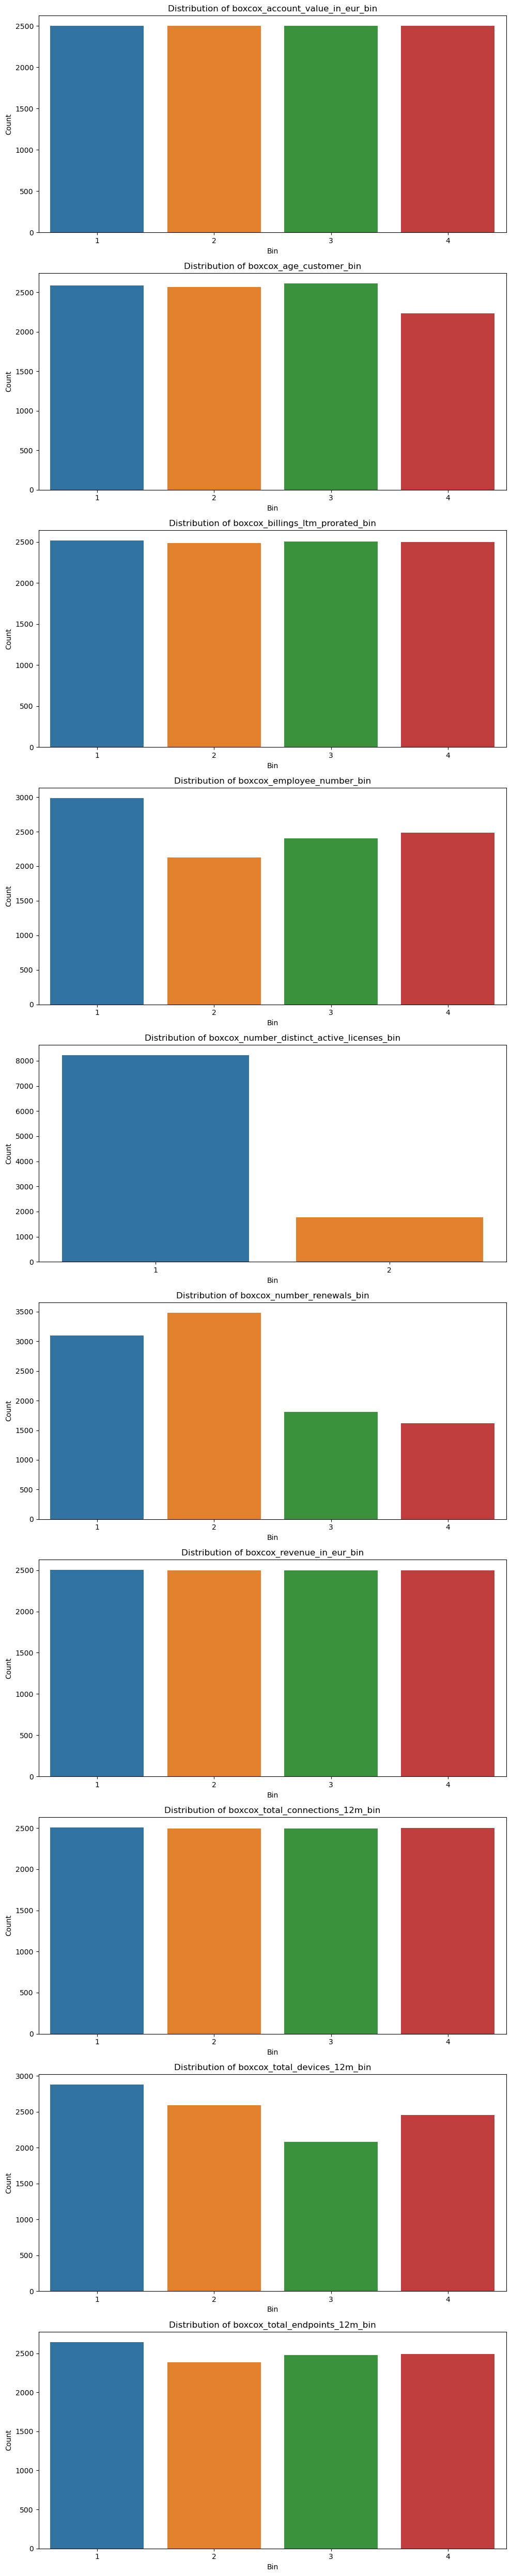

In [68]:
# Prepare data for plotting
cols_to_plot = [col for col in numerical_df.columns if col.endswith('_bin')]
data_to_plot = numerical_df[cols_to_plot]

# Plot the binned columns
num_plots = len(cols_to_plot)
fig, axes = plt.subplots(num_plots, 1, figsize=(10, num_plots * 5))

if num_plots == 1:
    axes = [axes]

for i, col in enumerate(cols_to_plot):
    bin_col = col
    sns.countplot(data=data_to_plot, x=bin_col, ax=axes[i])
    axes[i].set_title(f'Distribution of {bin_col}')
    axes[i].set_xlabel('Bin')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [67]:
data_to_plot

boxcox_account_value_in_eur_bin  boxcox_age_customer_bin  \
42083                                2                        2   
71825                                3                        2   
99535                                4                        2   
47879                                4                        4   
36734                                1                        1   
...                                ...                      ...   
8630                                 2                        1   
34828                                2                        1   
6061                                 4                        4   
39561                                4                        4   
61044                                3                        2   

       boxcox_billings_ltm_prorated_bin  boxcox_employee_number_bin  \
42083                                 2                           1   
71825                                 3                           3   
99535                                 4                           4   
47879                                 3                           2   
36734                                 2                           4   
...                                 ...                         ...   
8630                                  3                           2   
34828                                 3                           1   
6061                                  4                           3   
39561                                 4                           3   
61044                                 4                           4   

       boxcox_number_distinct_active_licenses_bin  boxcox_number_renewals_bin  \
42083                                           1                           2   
71825                                           1                           2   
99535                                           1                           2   
47879                                           1                           4   
36734                                           1                           1   
...                                           ...                         ...   
8630                                            1                           1   
34828                                           1                           1   
6061                                            2                           2   
39561                                           2                           2   
61044                                           1                           2   

       boxcox_revenue_in_eur_bin  boxcox_total_connections_12m_bin  \
42083                          1                                 2   
71825                          4                                 4   
99535                          4                                 1   
47879                          1                                 4   
36734                          4                                 2   
...                          ...                               ...   
8630                           3                                 1   
34828                          1                                 2   
6061                           3                                 4   
39561                          2                                 4   
61044                          4                                 4   

       boxcox_total_devices_12m_bin  boxcox_total_endpoints_12m_bin  
42083                             3                               2  
71825                             4                               4  
99535                             2                               2  
47879                             4                               3  
36734                             2                               3  
...                             ...                             ...  
8630                              1          